In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train_and_test2.csv
/kaggle/input/first-ssh/id_ed25519.pub
/kaggle/input/first-ssh/id_ed25519
/kaggle/input/first-ssh/Bash


In [2]:
!mkdir -p /root/.ssh
!cp /kaggle/input/first-ssh/id_ed25519 /root/.ssh/
!cp /kaggle/input/first-ssh/id_ed25519.pub /root/.ssh/
!chmod 600 /root/.ssh/id_ed25519
!ssh-keyscan github.com >> /root/.ssh/known_hosts
!ssh -T git@github.com


# github.com:22 SSH-2.0-9e814c2a
# github.com:22 SSH-2.0-9e814c2a
# github.com:22 SSH-2.0-9e814c2a
# github.com:22 SSH-2.0-9e814c2a
# github.com:22 SSH-2.0-9e814c2a
Hi TIMAR101/DS_journey! You've successfully authenticated, but GitHub does not provide shell access.


In [3]:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import OrdinalEncoder
class TitanicAnalyzer:
    def __init__(self, path):
        
        self.path = path
        self.df = None
        self.X_train, self.X_valid, self.y_train, self.y_valid = None, None, None, None
        self.scaler = StandardScaler()
        self.model = LogisticRegression(max_iter=1000, random_state=42)
        
    def load(self):
        """Загрузка данных из CSV файла"""
        try:
            self.df = pd.read_csv(self.path)
            print("✅ Данные загружены")
            print(f"Размер данных: {self.df.shape}")
            return True
        except FileNotFoundError:
            print("❌ Файл не найден")
            return False
    
    def show_info(self, n =5):
        """Исследование данных"""
        if self.df is None:
            print("Данные не загружены! Сначала вызовите load()")
            return
        
        print("\n" + "="*50)
        print("Первые {} строк:".format(n))
        display(self.df.head(n))
        
        print("\n" + "="*50)
        print("Основная информация:")
        print(self.df.info())
        
        print("\n" + "="*50)
        print("Пропущенные значения:")
        print(self.df.isnull().sum())
        
        print("\n" + "="*50)
        print("Статистика числовых признаков:")
        display(self.df.describe())

    def preprocess(self):
        """Комплексная предобработка данных"""
        if self.df is None:
            print("Данные не загружены! Сначала вызовите load()")
            return

        self.cols_with_missing = [col for col in self.df.columns if self.df[col].isnull().any()]
        print("Столбцы с пропущенными значениями")
        print(self.cols_with_missing)
        self.cols_non_numeric = [ col for col in self.df  if self.df[col].dtype == "object" ]
        print("Столбцы с нечисловыми значениями")
        print(self.cols_non_numeric)

        self.cols_numeric = [ col for col in self.df  if self.df[col].dtype != "object" ]

        print("Столбцы с числовыми значениями")
        print(self.cols_numeric)

        
        # 1. Исправление названий столбцов
        self._fix_columns_names()
        
        # 2. Обработка пропущенных значений
        if self.cols_with_missing:
            self._handle_missing_values()
        
        # 3. Обработка категориальных признаков
        if self.cols_non_numeric:
            self._encode_categorical()
        
        # 4. Создание новых признаков
        #self._create_features()
        
        print("✅ Предобработка завершена")
    def _fix_columns_names(self):

        if self.df is not None:

            corrections = {
                '2urvived': 'Survived',
                'PasengerId': 'PassengerId',  # Пример другой возможной ошибки
                'Fare': 'TicketPrice'         # Пример переименования
            }
            valid_columns = {key:val for key, val in corrections.items() if key in self.df.columns}

            self.df.rename(columns = valid_columns, inplace = True)

            print(f"Переменованы следующие столбцы: {valid_columns}")

        else:
            print("Данные не загруженные! Сначала вызовите метод load!")

    def _handle_missing_values(self):

        for col in self.cols_with_missing:

            if col  in self.cols_numeric:

                self.df[col] = self.df[col].fillna(self.df[col].median())

            else:
                self.df[col] = self.df[col].fillna(self.df[col].mode()[0])
        print("✅ Пропущенные значения заполнены")       
                
        
           

    def _encode_categorical(self):

        enc = OrdinalEncoder()
        df[self.cols_non_numeric] = enc.fit_transform(df[self.cols_non_numeric])       

            
    def prepare_model_data(self):

        print(self.df['Survived'].unique())
        print(self.df['Survived'].isnull().sum())
        features = ['Pclass', 'Sex', 'Age', 'sibsp', 'Parch', 'TicketPrice', 
                    'Embarked']
        missing = [f for f in features if f not in self.df]
        if missing:
            print(f"❌ Отсутствуют признаки: {missing}")
            return False
        X = self.df[features]
        # Масштабирование
        X = self.scaler.fit_transform(X)
        #X = self.df.drop('Survived', axis=1)
        y = self.df['Survived']
        self.X_train, self.X_valid, self.y_train, self.y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
        return True
    

    def train_model(self):

        if self.X_train is None or self.y_train is None:
            print("❌ Данные не подготовлены!")
            return

        #print("Проверка на пропущенные значения:")

        #print(self.X_train.isnull().sum())
        #print(self.y_train.isnull().sum())        


        """Обучение модели"""
       
        
        self.model.fit(self.X_train, self.y_train)
        print("✅ Модель обучена")
        
        # Оценка модели
        self.evaluate_model()

    def evaluate_model(self):
        """Оценка модели"""
        y_pred = self.model.predict(self.X_valid)
        
        print("\n" + "="*50)
        print("Accuracy: {:.2f}%".format(accuracy_score(self.y_valid, y_pred)*100))
        
        print("\nClassification Report:")
        print(classification_report(self.y_valid, y_pred))
        
        print("\nConfusion Matrix:")
        plt.figure(figsize=(8, 6))
        sns.heatmap(confusion_matrix(self.y_valid, y_pred), 
                   annot=True, fmt='d', cmap='Blues',
                   xticklabels=['Predicted 0', 'Predicted 1'],
                   yticklabels=['Actual 0', 'Actual 1'])
        plt.title('Confusion Matrix')
        plt.show()

    def visualize(self):
        """Визуализация данных"""
        plt.figure(figsize=(15, 12))
        
        plt.subplot(2, 2, 1)
        sns.countplot(x='Survived', data=self.df)
        plt.title('Распределение выживших')
        
        plt.subplot(2, 2, 2)
        sns.countplot(x='Sex', hue='Survived', data=self.df)
        plt.title('Выживаемость по полу')
        
        plt.subplot(2, 2, 3)
        sns.countplot(x='Pclass', hue='Survived', data=self.df)
        plt.title('Выживаемость по классу')
        
        plt.subplot(2, 2, 4)
        sns.histplot(x='Age', hue='Survived', data=self.df, kde=True, element='step')
        plt.title('Распределение возраста')
        
        plt.tight_layout()
        plt.show()   
            


✅ Данные загружены
Размер данных: (1309, 28)

Первые 5 строк:


,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0



Основная информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passengerid  1309 non-null   int64  
 1   Age          1309 non-null   float64
 2   Fare         1309 non-null   float64
 3   Sex          1309 non-null   int64  
 4   sibsp        1309 non-null   int64  
 5   zero         1309 non-null   int64  
 6   zero.1       1309 non-null   int64  
 7   zero.2       1309 non-null   int64  
 8   zero.3       1309 non-null   int64  
 9   zero.4       1309 non-null   int64  
 10  zero.5       1309 non-null   int64  
 11  zero.6       1309 non-null   int64  
 12  Parch        1309 non-null   int64  
 13  zero.7       1309 non-null   int64  
 14  zero.8       1309 non-null   int64  
 15  zero.9       1309 non-null   int64  
 16  zero.10      1309 non-null   int64  
 17  zero.11      1309 non-null   int64  
 18  zero.12      1309 non-null

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.0,1309.0,1309.0,1309.0,1309.0,...,1309.0,1309.0,1309.0,1309.000000,1309.0,1309.0,1307.000000,1309.0,1309.0,1309.000000
mean,655.000000,29.503186,33.281086,0.355997,0.498854,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.294882,0.0,0.0,1.492731,0.0,0.0,0.261268
std,378.020061,12.905241,51.741500,0.478997,1.041658,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.837836,0.0,0.0,0.814626,0.0,0.0,0.439494
min,1.000000,0.170000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
25%,328.000000,22.000000,7.895800,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.000000,0.0,0.0,1.000000,0.0,0.0,0.000000
50%,655.000000,28.000000,14.454200,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.000000,0.0,0.0,2.000000,0.0,0.0,0.000000
75%,982.000000,35.000000,31.275000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.000000,0.0,0.0,2.000000,0.0,0.0,1.000000
max,1309.000000,80.000000,512.329200,1.000000,8.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.000000,0.0,0.0,2.000000,0.0,0.0,1.000000


Столбцы с пропущенными значениями
['Embarked']
Столбцы с нечисловыми значениями
[]
Столбцы с числовыми значениями
['Passengerid', 'Age', 'Fare', 'Sex', 'sibsp', 'zero', 'zero.1', 'zero.2', 'zero.3', 'zero.4', 'zero.5', 'zero.6', 'Parch', 'zero.7', 'zero.8', 'zero.9', 'zero.10', 'zero.11', 'zero.12', 'zero.13', 'zero.14', 'Pclass', 'zero.15', 'zero.16', 'Embarked', 'zero.17', 'zero.18', '2urvived']
Переменованы следующие столбцы: {'2urvived': 'Survived', 'Fare': 'TicketPrice'}
✅ Пропущенные значения заполнены
✅ Предобработка завершена


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


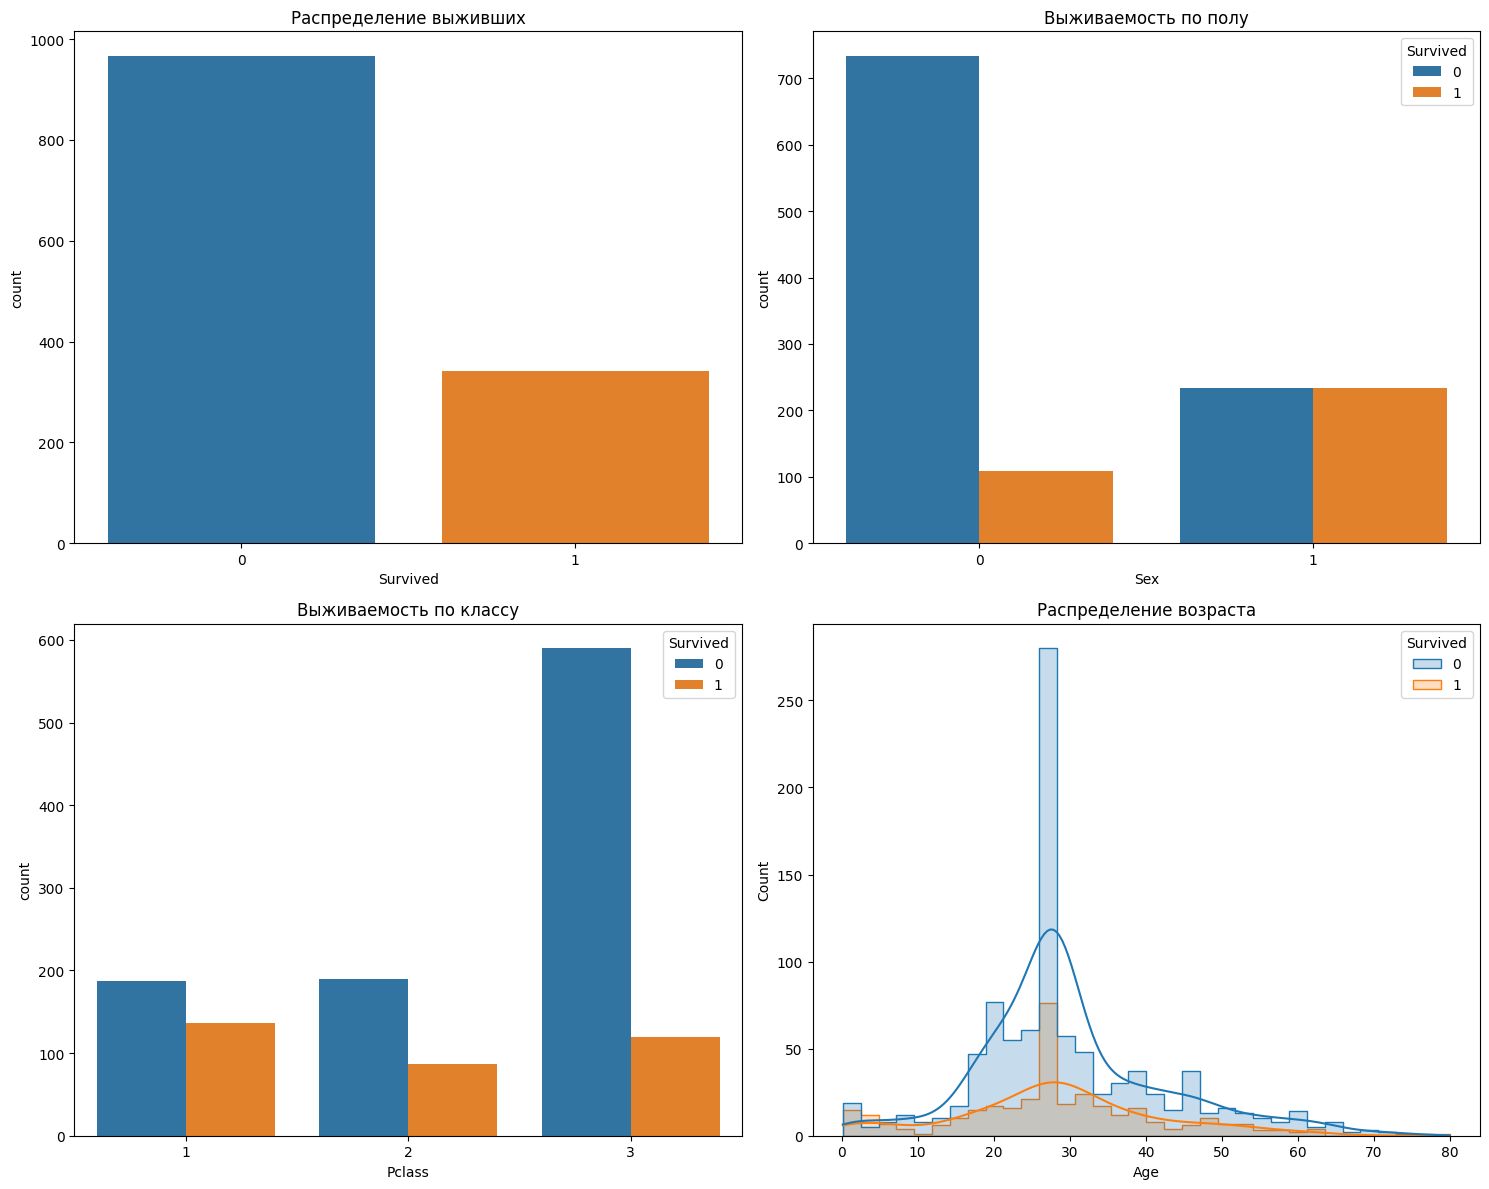

[0 1]
0
✅ Модель обучена

Accuracy: 76.72%

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.92      0.85       189
           1       0.64      0.37      0.47        73

    accuracy                           0.77       262
   macro avg       0.72      0.65      0.66       262
weighted avg       0.75      0.77      0.74       262


Confusion Matrix:


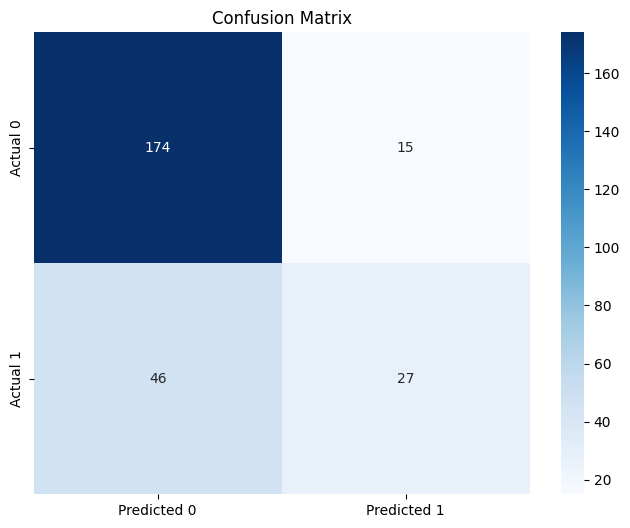

In [4]:
analyzer = TitanicAnalyzer("/kaggle/input/titanic/train_and_test2.csv")
if analyzer.load():

    analyzer.show_info()
    analyzer.preprocess()
    analyzer.visualize()
    
    
    
    if analyzer.prepare_model_data():
        # Обучение и оценка модели
        analyzer.train_model()








In [5]:
!mkdir -p /kaggle/working/ssh_keys
!cp /root/.ssh/id_ed25519 /kaggle/working/ssh_keys/
!cp /root/.ssh/id_ed25519.pub /kaggle/working/ssh_keys/
